![](https://www.hopkinsmedicine.org/-/media/images/health/1_-conditions/infectious-diseases/coronavirus-hero.ashx?h=500&la=en&mh=500&mw=1300&w=1297&hash=6464CC9E4F6364821A5973E670CFB3342C2D9AF4)
# Task 2: What do we know about COVID-19 risk factors?


> We have power over the things we give a name.

The CORD-19 Challenge is a list of 10 tasks that need to performed upon a fairly large corpus of scientific literature relating to the discipline of Virology and other related fields. The tasks listed in this challenge can be classified into two primary categories:

1. What do we know about...
2. What has been published...

While the two are, a priori, different questions, for the purposes of this challenge, we believe that we can treat them as interchangeable. We make this assumption because the authors of this notebook are not placed well so as to be able to tell the difference between what has been published and what is 'known' in the fields which this corpus concerns itself. Further, it is true to a fairly large degree that one cannot answer the first question without answering the second. Hence, for the rest of this notebook, we concern ourselves with the second question.

Any answer to a question about what has been published does not serve its purpose unless it also describes the relationships between the several pieces of literature. This is because a survey is seldom about data, and often about relationships. Thus in this notebook, we have attempted to:

1. Identify articles of particular interest and merit about the various subtasks listed.
2. Make a map of the relationships between these articles.

The first task is achieved by stemming and tokenization, the second has been achieved by methods of agglomerative clustering and its [visualization](https://seaborn.pydata.org/generated/seaborn.clustermap.html).

## The Process

The following actions form the building blocks of this process:
1. Choosing a vocabulary------------------------------------>(User Input)
2. Generating Cluster Maps---------------------------------->(Using Lemmatization, Vectorization and Agglomerative Clustering)
3. Inspecting Cluster Maps to identify promising articles--->(User Discretion)
4. Inspecting Data Frames to read document contents--------->(User Discretion)

The flow of the process is described in this diagram:

![](https://github.com/sagarkolte/CORD-19/blob/master/KaggleSubmissionMaterial/Screenshot%202020-04-04%20at%209.04.56%20PM.png?raw=true)

In order to search for information about the topics listed in the subtask, we paid special attention to the set of words that best described the subtask. Thus every search began with the choice of a vocabulary. We then associated to each document a vector by listing out the number of times each word in the vocabulary appeared in the absrtact of the article. We then used cluster maps to visualize what the set of all abstracts looked like as a set of vectors. This served two purposes:

1. The cluster map gave us information about the availability of research on a certain topic.

2. How much of this research was in the context of the other words in the vocabulary.

For example, if we included the word 'virus' in the vocabulary, the clustermap showed that there was coupious amounts of research on the subject. However, very little of that was in the context of the Coronavirus, which is the focus of this challenge. Thus we have avoided including the word 'virus' in our vocabulary as it clouds the more subtle details in the clustermap.

Once we have a view of the cluster map produced by the whole vocabulary, we restrict the vocabulary to fewer words and generate the cluster maps again. In this iteration, we see that the cluster maps aid us greatly in identifying promising articles rapidly.

We illustrate this process with an example:


Task 1, Subtask 1: Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery.


Vocabulary:

1. incubation
2. age
3. convalescent
4. transmission
5. contagious
6. carrier
7. convalescence


From the Main Cluster map, we conclude that:

1. The relationship between age and transmission seems to be particularly well represented in the corpus.
2. Incubation and transmission seem to have been discussed in a reasonable number of articles, it is however not as many as the first category.
3. While 'convalescence' seems like a sparingly used word in the corpus, 'recovery' and 'transmission' appear together in a few documents, this gives us the hope that we might find information about convalescent transmitters in this overlap.
4. We also seem fairly well placed in terms of finding information about 'transmission' during 'incubation'.
5. The dependence of 'age' on 'incubation' periods also might be present here.

![MainClusterMap_1_1](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_1/MainClusterMap_1_1.png?raw=true)

We further restrict our vocabulary to the words: transmission, incubation, age.

And identify the article with SHA 091a8e9a61e19e88caeb039f0e3888d111b20439.

An actual investigation of the article will reveal that the content is very relevant to the subtask.

![age_incubation_1_1.png](https://github.com/sagarkolte/CORD-19/blob/master/Task_1/Sub_Task_1/age_incubation_1_1.png?raw=true)

We use this process repeatedly to arrive at articles relevant to the various subtasks.

## Summary of the search methodology

1. Define a vocabulary
2. Generate the main cluster diagram. (This .png file is saved in the output folder)
3. Informed by the inspection of the main cluster diagram define a sub-vocabulary.
4. Generate a cluster diagram using the sub-vocabulary. (This .png file is saved in the output folder)
5. Generate an html file that contains the Title, Abstract and Author information of the most relevant papers. 
6. To parse the full text of a particular SHA, we use the function *get_sentences('sha','word_to_search')*

## Notes about the algorithms used

The principal philosophy at work here is that:

1. Given a set of words, we can associate to every document a vector of the count of words. **([Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation), [tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html))
2. We then treat all documents as vectors and perform agglomerative clustering the set of vectors. **([Agglomerative Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example))
3. We represent the results of our clustering using cluster maps. **([Seaborn Cluster Maps](https://seaborn.pydata.org/generated/seaborn.clustermap.html))
4. We use sentence tokenization to search for sentences that contain the words of our interest. **([sent_tokenize](https://www.nltk.org/api/nltk.tokenize.html))



## Drawbacks of the proposed approach

1. The algorigithm currently is only vectorizing article abstracts. While getting it to parse the whole text is not a difficult code change, it consumes a significant amount of comuting power and time. We did not have this luxury given the deadlines. 

    Possible Resolution: We call upon the experts in parallel processing and threading to help us out with this issue.
    
2. We have not managed to make our cluster maps interactive, for instance, if we find a particular row of the map interesting, we should be able to hover over the row to be able to see the abstract and title of the associated article.

    Possible Resolution: We call upon the members well versed with interactive visualization libraries in Python to collaborate with us on this topic.






In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import json
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer
import spacy
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
nlp.max_length = 1500000
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations 
import functools
import operator
stop_words = set(stopwords.words('english'))
import os
import pathlib
from shutil import copyfile
from shutil import copy
from nltk import sent_tokenize, word_tokenize
pd.options.display.max_colwidth = 2000
from nltk.util import ngrams

In [2]:
#All the file path information
mypath = '../input/CORD-19-research-challenge/'
docdir1= 'biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/'
docdir2 = 'comm_use_subset/comm_use_subset/pdf_json/'
docdir3 = 'custom_license/custom_license/pdf_json/'
docdir4 = 'noncomm_use_subset/noncomm_use_subset/pdf_json/'
root = './'
dir_list = [docdir1,docdir2,docdir3,docdir4]

#####################################################-------------------------------->Extracting Relevant Metadata from a given json

def create_refkeys(n):#-------------------------------->Used to extract references
    key_list = ['BIBREF'+str(i) for i in range(n) ]
    return key_list

def journals_reffered(p_dict):#------------------------->Gets all the journal names in the bibliography
    try:
        n = len(p_dict['bib_entries'])
        ref_list = create_refkeys(n)
        j_ref = [p_dict['bib_entries'][ref]['venue'] for ref in ref_list]
    except:
        j_ref = 'NA'
    return j_ref

def sha_to_ngram(sha,word,n):
    text = sha_to_text(sha)
    ngrams = ngram_filter(text, word,n)
    return ngrams



def get_sha(p_dict):#------------------------------------>Gets the SHA of the article
    try:
        sha = p_dict['paper_id']
    except:
        sha = 'NA'
    return sha

def get_title(p_dict):#---------------------------------->Gets the title
    try:
        title = p_dict['metadata']['title']
    except:
        title = 'NA'
    return title

def get_doi_meta(text):#---------------------------------->Guesses the doi of the article from the text
    try:
        #file_str = str(json_to_dict(sub_dir,file_name)).replace('\'','')
        doi = re.findall('doi.org/(.*?)[\s]',text)[0]
    except:
        doi = 'NA'
    return doi

def get_first_author(p_dict):#------------------------------>Gets the first author
    try:
        first = p_dict['metadata']['authors'][0]['first']
        last =  p_dict['metadata']['authors'][0]['last']
        name = first+' '+last
    except:
        name = 'NA'
    return name

def get_institution(p_dict):#-------------------------------->Gets the institution to which the first author is affiliated
    try:
        inst = p_dict['metadata']['authors'][0]['affiliation']['institution']
    except:
        inst = 'NA'
    return inst

def text_to_vec_meta(text,task):#----------------------------->Creates a vector given an abstract and a vocabulary(task)
    l = tok_pun_lem(text)
    c_dict = Counter(l)
    c_dict = {k:[c_dict[k]] for k in task }
    df = pd.DataFrame(c_dict)
    return df

def get_abstract(p_dict):#------------------------------------>Gets the abstract of the article
    try:
        abstract = p_dict['abstract'][0]['text']
    except:
        abstract = 'NA'
    return abstract

def create_row_meta(subdir,file_name,task):#------------------->Puts all the metadata into a single row with the word counts
    #print('running create_row_meta...')
    p_dict = json_to_dict(subdir,file_name)
    text =  str(p_dict).replace('\'','')
    sha = get_sha(p_dict)
    title = get_title(p_dict)
    author = get_first_author(p_dict)
    institution = get_institution(p_dict)
    doi = get_doi_meta(text)
    abstract = get_abstract(p_dict)
    p_dict = get_abstract(p_dict)
    text =  str(p_dict).replace('\'','')
    df1 = text_to_vec_meta(text,task)
    df2 = pd.DataFrame({'SHA':[sha], 
                        'Title':[title], 
                        'First Author':[author], 
                        'Institution':[institution], 
                        'DOI':[doi], 
                        'Abstract':[abstract]})
    df = pd.concat([df2,df1],axis = 1)
    return df

def sha_to_meta(sha):#------------------->Puts all the metadata into a single row with the word counts
    file_path = sha_to_file_path(sha)
    p_dict = json_to_dict_1(file_path)
    text =  str(p_dict).replace('\'','')
    sha = get_sha(p_dict)
    title = get_title(p_dict)
    author = get_first_author(p_dict)
    institution = get_institution(p_dict)
    doi = get_doi_meta(text)
    abstract = get_abstract(p_dict)
    p_dict = get_abstract(p_dict)
    #text =  str(p_dict).replace('\'','')
    #df1 = text_to_vec_meta(text,task)
    df2 = pd.DataFrame({'SHA':[sha], 
                        'Title':[title], 
                        'First Author':[author], 
                        'Institution':[institution], 
                        'DOI':[doi], 
                        'Abstract':[abstract]})
    #df = pd.concat([df2,df1],axis = 1)
    return df2.T



def meta_pipeline(task):#--------------------------------------------------------------->Gives the final dataframe for all articles which have an abstract
    task_number = task[0]
    subtask_number = task[1]
    task = task[2]
    g = lambda subdir,task:pd.concat([create_row_meta(subdir,file_name,task) for file_name in get_file_list(subdir,mypath)])
    df_list = list(map(g,dir_list,[task]*len(dir_list)))
    df_final = pd.concat(df_list)
    o = create_task_dir(task_number,subtask_number)
    dest_file = root+o+'/'+'MetaTable_'+str(task_number)+'_'+str(subtask_number)+'.csv'
    try:
        os.makedirs(root+o)
    except:
        df_final.to_csv(dest_file)    
    df_final.to_csv(dest_file)
    return df_final


def word_selector(df,word_list):#------------------------------------------------------->Returns a data frame containing articles with words specified in the list
    df['flag'] = df.apply(lambda row:np.prod(row[word_list]), axis=1)
    df = df[df['flag']!=0]
    df = df.drop('flag',axis = 1)
    df = df.loc[:, (df != 0).any(axis=0)]
    df = df.sort_values(word_list,ascending = False)
    df = df[0:15]
    df = df.loc[:, (df != 0).any(axis=0)]
    return df

def get_top_matches(df,word_list,task):
    task_number = task[0]
    subtask_number = task[1]
    #df['sum'] = df.apply(lambda row:np.sum(row[word_list]),axis=1)
    #df = df.sort_values('sum', ascending=False)
    #df = df.head(5)
    o = create_task_dir(task_number,subtask_number)
    dest_file = root+o+'/'+'TopMatches_'+str(task_number)+'_'+str(subtask_number)+'.csv'
    df.to_csv(dest_file)
    return df
    

########################################################-------------------------------->Extracting Relevant Metadata from a given json

In [3]:
#######################################################--------------------------------->Natural Language Processing module
def get_file_list(sub_dir,mypath=mypath):#---------------------------------------------->fetches the list of files from a subdirectory.
    #print('running get_file_list...')
    #print(mypath+sub_dir)
    #print(listdir(mypath+sub_dir))
    onlyfiles = [f for f in listdir(mypath+sub_dir) if isfile(join(mypath+sub_dir, f))]
    #print(len(onlyfiles))
    return onlyfiles

def get_file_list_1(sub_dir,mypath):#---------------------------------------------->fetches the list of files from a subdirectory.
    (curdir,dir_names, onlyfiles) = next(os.walk(mypath+sub_dir+'/pdf_json'))
    print('running get_file_list...')
    print(mypath+sub_dir)
    print(listdir(mypath+sub_dir))
    #onlyfiles = [f for f in listdir(mypath+sub_dir) if isfile(join(mypath+sub_dir, f))]
    #print(len(onlyfiles))
    return onlyfiles

def functools_reduce_iconcat(a):
    return functools.reduce(operator.iconcat, a, [])



def json_to_dict(sub_dir,filename,mypath=mypath):#--------------------------------------->Converts json flies to dict.
    full_path = mypath+sub_dir+filename
    with open(mypath+sub_dir+filename, "r") as read_file:
        data = json.load(read_file)
    return data

def json_to_dict_1(full_path):#---------------------------------------------------------->Converts json flies to dict.
    with open(full_path, "r") as read_file:
        data = json.load(read_file)
    return data


def get_doi(sub_dir,file_name):#---------------------------------------------------------->Guesses the doi of the article from the text
    try:
        file_str = str(json_to_dict(sub_dir,file_name)).replace('\'','')
        doi = re.findall('doi.org/(.*?)[\s]',file_str)[0]
    except:
        doi = 'NA'
    return doi

def tok_pun_lem(text):#------------------------------------------------------------------->Tokenizes, Removes Punctuation and Lemmatizes
    tokenizer = RegexpTokenizer(r'\w+')
    result = tokenizer.tokenize(text.lower())
    new_sentence = list(filter(lambda x:False if x in stop_words else True,result))
    new_sentence_s = " ".join(new_sentence)
    doc = nlp(new_sentence_s)
    new_sentence_l = [token.lemma_ for token in doc]
    return new_sentence_l

def ngram_filter(doc, word, n):
    tokens = doc.split()
    all_ngrams = ngrams(tokens, n)
    filtered_ngrams = [x for x in all_ngrams if word in x]
    return filtered_ngrams


def abst_to_vec(sub_dir,task):#----------------------------------------------------------->Creates a vector given an abstract and a vocabulary(task)
    
    file_list = get_file_list(sub_dir)
    print('old len',len(file_list))
    file_list = filter(lambda file_name: True if len(json_to_dict(sub_dir,file_name)['abstract'])>0 else False, file_list) 
    text_list = [json_to_dict(sub_dir,file_name)['abstract'][0]['text'].lower() for file_name in file_list]
    print('new len',len(text_list))
    l_list = [tok_pun_lem(text) for text in text_list]
    c_dict_list = [Counter(l) for l in l_list]
    c_dict_list = [{k:[c_dict[k]] for k in task } for c_dict in c_dict_list]
    df_list = [pd.DataFrame(c_dict) for c_dict in c_dict_list]
    final_df = pd.concat(df_list)
    print('final len',len(final_df))
    return final_df

def text_to_vec(sub_dir,task):#----------------------------------------------------------->Creates a vector given an abstract and a vocabulary(task)
    file_list = get_file_list(sub_dir)
    print('old len',len(file_list))
    text_list = [str(json_to_dict(sub_dir,file_name)).lower().replace('\'','') for file_name in file_list]
    print('new len',len(text_list))
    l_list = [tok_pun_lem(text) for text in text_list]
    c_dict_list = [Counter(l) for l in l_list]
    c_dict_list = [{k:[c_dict[k]] for k in task } for c_dict in c_dict_list]
    df_list = [pd.DataFrame(c_dict) for c_dict in c_dict_list]
    final_df = pd.concat(df_list)
    print('final len',len(final_df))
    return final_df
####################################################--------------------------------------->Natural language processing module
def abst_pipeline(task):
    df_list = [abst_to_vec(subdir,task) for subdir in dir_list]
    df = pd.concat(df_list)
    return df

def text_pipeline(task):
    df_list = [abst_to_vec(subdir,task) for subdir in dir_list]
    len_list = [len(x) for x in df_list]
    print(len_list)
    df = pd.concat(df_list)
    print(len(df))
    return df
###############################################--------------------------------------------->Data Extraction Pipeline
def get_full_paths(root):
    path_list = [str(i) for i in list(pathlib.Path('../').glob('**/*'))]    
    return path_list

def sha_to_file_path(sha):
    path_list = get_full_paths(root)
    g = lambda x: sha in x 
    file_path = list(filter(g,path_list))
    return file_path[0]

def get_sentences(sha,word):
    text = sha_to_text(sha)
    text = re.sub('[{:\}]', '', text) 
    sentences = sent_tokenize(text) 
    g = lambda x : True if word in word_tokenize(x) else False
    sentences = list(filter(g,sentences))
    #sentences = [i for i in sent_tokenize(text) if "word" in word_tokenize(i)]
    
    return sentences

def sha_to_text(sha):#---------------------------------------------------------------------->Gets the full text of the article given the SHA.
    full_path = sha_to_file_path(sha)
    with open(full_path, "r") as read_file:
        data = json.load(read_file)
    text = str(data).lower().replace('\'','')
    return text



def save_sha(sha,task_number,subtask_number):
    o = create_task_dir(task_number,subtask_number)
    file_name = sha_to_file_path(sha)
    dest_file = root+o+'/'+sha+'.json'
    os.makedirs(os.path.dirname(dest_file), exist_ok=True)
    try:
        copy(file_name,dest_file)#----copyfile
    except:
        return None
    return None

def create_task_dir(task_number,subtask_number):
    o = 'Task_'+str(task_number)+'/'+'Sub_Task_'+str(subtask_number)
    return o

def sha_pipeline(df,task_number,subtask_number):
    #sha_list = list(df['SHA'])
    sha_list = df.index.values.tolist()
    l = list(map(save_sha,sha_list,[task_number]*len(sha_list),[subtask_number]*len(sha_list)))
    return None
##################################################------------------------------------------>Data Extraction Pipeline

## Vocabularies for the subtasks in Task 2

In [4]:
task21 = [2,1,['coronavirus','risk','factors','smoking','coinfection','preexisting','chronic','lung','covid','pulmonary','pregnant','children','child','social','behavioral','economic']]
#task21 = [2,1,['coinfection','comorbidity','covid','coronavirus','transmissible','transmissibility']]
task22 = [2,2,['transmission','dynamics','coronavirus','covid','basic','reproductive','number','incubation','serial','interval','mode','environment']]
task23 = [2,3,['severity','fatality','risk','coronavirus','high','patient','covid','fatal','severe','cancer','novel','heart','cardiovascular']]
task23 = [2,3,['severity','fatality','risk','coronavirus','high','patient','covid','fatal','severe','cancer','novel','heart','hypertension','diabetes']]
#task24 = [2,4,['susceptibility',,'susceptible','population','covid','coronavirus']]
task25 = [2,5,['public','health','mitigation','measures','control','covid','coronavirus','strategy']]

In [5]:
task = task25#---------------------->Change the task here

In [6]:
task_number = task[0]
subtask_number = task[1]
df = meta_pipeline(task)#----------->Create the main dataframe for the subtask

In [7]:
cluster_df = df[task[2]]
cluster_df['sum'] = cluster_df.apply(lambda row:sum(np.array(row)),axis = 1)
cluster_df = cluster_df[cluster_df['sum']>1]
cluster_df = cluster_df.drop('sum',axis=1)
cluster_df = cluster_df.loc[:, (cluster_df != 0).any(axis=0)]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Create the Main Cluster Map of the relevant literature

/opt/conda/lib/python3.6/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


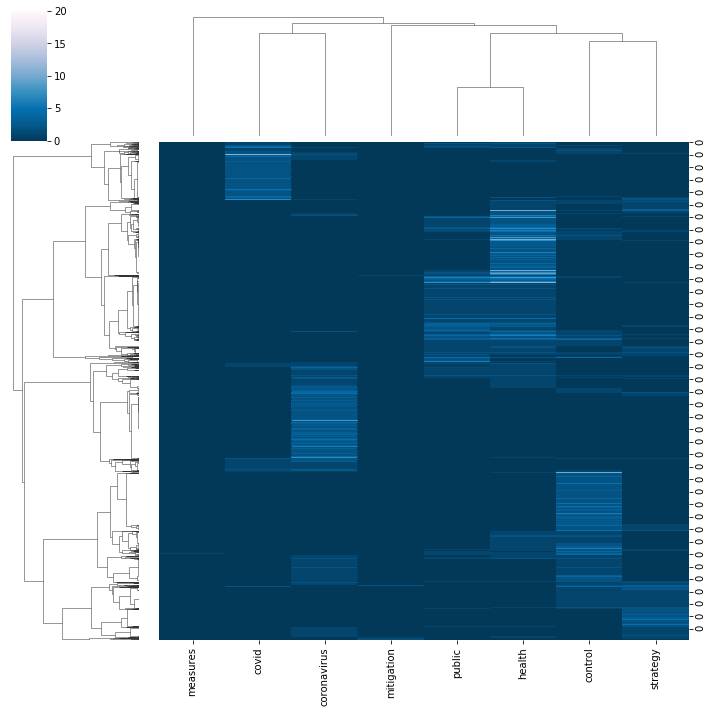

In [8]:
g = sns.clustermap(cluster_df,cmap='PuBu_r',metric = 'cosine')
o = create_task_dir(task_number,subtask_number)
dest_file = root+o+'/'+'MainClusterMap_'+str(task_number)+'_'+str(subtask_number)+'.png'
g.savefig(dest_file, dpi=400,bbox_inches='tight')

## Select words from the subtask vocabulary to uncover relevant articles

In [9]:
word_list = ['public','health','covid']#------------->study map above and select words here
df1 = word_selector(df,word_list)

## Create a cluster map for the smaller vocabulary

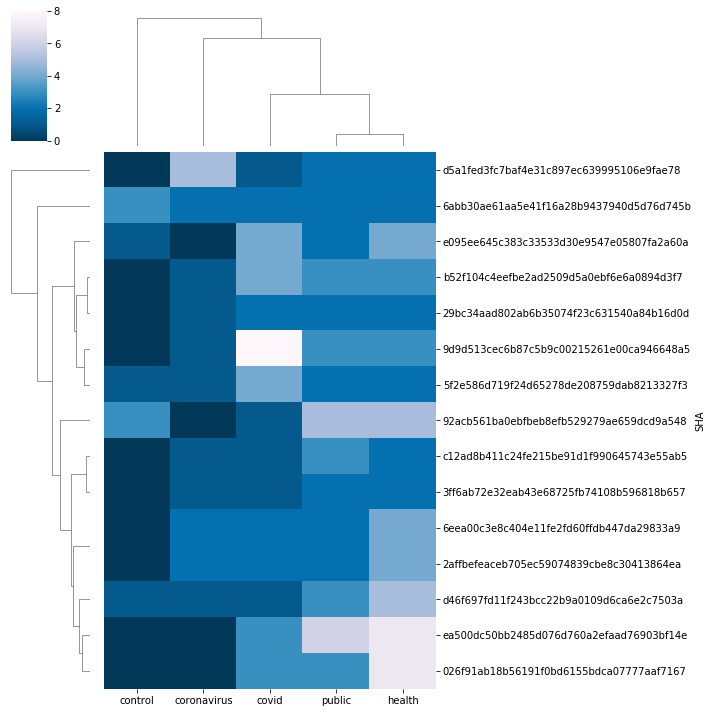

In [10]:
df1_cluster = df1.set_index("SHA", inplace = False) 
df1_cluster = df1_cluster.drop(['Title','First Author','Institution','DOI','Abstract'],axis=1)
g = sns.clustermap(df1_cluster,cmap='PuBu_r',metric = 'cosine',yticklabels=True)
o = create_task_dir(task_number,subtask_number)
dest_file = root+o+'/'+word_list[0]+'_'+word_list[-1]+'_'+str(task_number)+'_'+str(subtask_number)+'.png'
g.savefig(dest_file, dpi=400,bbox_inches='tight')

## Create a html document of the most relevant papers

In [11]:
df_save = get_top_matches(df1_cluster,word_list,task)
sorted_sha_list = list(df_save.sort_index().index.values)
meta_df_list = list(map(sha_to_meta,sorted_sha_list))
meta_df_final = pd.concat(meta_df_list)
task_number = task[0]
subtask_number = task[1]
o = create_task_dir(task_number,subtask_number)
dest_file = root+o+'/'+'sha_df'+word_list[0]+'_'+word_list[-1]+str(task_number)+'_'+str(subtask_number)+'.html'
meta_df_final.to_html(dest_file)
print ("please find the list of relevant papers saved as:"+dest_file)

please find the list of relevant papers saved as:./Task_2/Sub_Task_5/sha_dfpublic_covid2_5.html


In [12]:
n=2
ngram_list = [sha_to_ngram(sha,word_list[0],n) for sha in list(df_save.sort_index().index.values)]
ngram_list = functools_reduce_iconcat(ngram_list)
ngram_list = list(set(ngram_list))
g = lambda ngram: True if any(ele in stop_words for ele in list(ngram)) else False
f = lambda ngram: True if any(len(re.findall('\W',ele))>0 for ele in list(ngram)) else False
filtered_tuples = [w for w in ngram_list if not g(w)]
filtered_tuples = [w for w in filtered_tuples if not f(w)]

In [13]:
dest_file = root+o+'/'+str(n)+'-grams_'+word_list[0]+str(task_number)+'_'+str(subtask_number)+'.csv'
pd.DataFrame(filtered_tuples).to_csv(dest_file)

In [14]:
#filtered_tuples

## Search for excerpts within the article text using the SHA

In [15]:
#print('\n\n'.join(get_sentences('c738a511a9c18e7e831b40f1ec3605fe4cdeb6d1','doi')))

In [16]:
#sha_to_text('d9dcb14ca476c86cc7c61f7650b76b47def235d4')

# Task 2, Subtask 1: Data on potential COVID-19 risk factors.

## Main Cluster Diagram
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/MainClusterMap_2_1-6.png?raw=true)

## Observations on the Main Cluster Diagram
### Smoking as a risk factor, some general remarks.
As can be seen from the main cluster diagram, the articles that discuss smoking as a risk factor for COVID patients is rather sparse. Infact we found only two relevant articles on the subject. We will mention the findings in these articles in the subsection below.

### Preexisting Pulmonary Conditions as a risk factor
Here too the literature is surprisingly sparse, infact we found only one article in the corpus which discusses preexisting pulmonary conditons in the context of COVID. There is however, another article that discusses this risk factor in the context of SARS, which is a condition caused by the same family of viruses. We have mentioned these articles in the notes below.

### Coninfections as a factor that enhance transmissibility
There is no evidence of the presence of literature that studies the relationship between transmissibility of COVID-19 and coinfections or comorbidities. However this article discusses the phenomena for other diseases:
1026a224b61ae21079fcc5680b0cc6afef335523

### Comorbidity as a risk factor in COVID-19 patients
There seems to be conclusive literature on the effect of certain comorbidites on the severity of COVID-19 infections and fatalities. This will be discussed in some detail below.

### Pregnancy and COVID
This section is not an exception to the sparseness of literature, however it is better off than the previous sections. And the articles seem to be rather conclusive as will be summarized below.

### Risk faced by children in the context of COVID
There is conclusive, but not necessarily ample, research on the nature of COVID-19 among chidren.

### Social structure and other social factors
One hurdle we face while investigating this issue is the presence of the ubiquitous bigram 'social distancing' which is not always related to the topic at hand. However, the search has returned some relevant articles which will be presented below.

### Behavioral Factors
While there are articles discussing the importance of behavioral changes as a mitigation measure for the pandemic, we found no articles which study the behavioral differences in societies and their impact on the transmission of the virus.

### Economic Factors
While most articles returned by the algorithm are about the economic impact of the pandemic on countries and cities, there is one article which discusses the role of economic factors in the spread of the pandemic. We believe that a different choice of the vocabulary will give us more relevant results.

## Smoking and Preexisting Pulmonary Diseases
### Smoking
There seems to be evidence that current smokers (as opposed to eternal or heavy smokers) and people with chronic obstructive pulmonary diseases have a higher expression of **angiotensin converting enzyme II (ACE2)** which is used by the COVID-19 virus as a cellular entry receptor to infect the lower respiratory tract. Specifically:

        Leung et al.(https://doi.org/10.1183/13993003.00688-2020) observe that "Because individuals with chronic obstructive pulmonary disease (COPD) are at increased risk of severe COVID-19, we determined whether ACE-2 expression in the lower airways was related to COPD and cigarette smoking."

        
        Finally they conclude saying: *Current smoking also significantly increased ACE2 expression levels compared with never smokers (never current smokers=2.77 (90.91) CPM versus smokers=1.78 (0.39) CPM, p=0.024). These findings were replicated in the two external cohorts. Conclusions: ACE2 expression in lower airways is increased in patients with COPD and with current smoking. These data suggest that these two subgroups are at increased risk of serious COVID19 infection and highlight the importance of smoking cessation in reducing the risk.*

- The Cluster diagram for the word smoking is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/smoking_covid_2_1.png?raw=true)


### Preexisting Pulmonary Conditions
In addition to the work on Leung et al. on COPDs as a risk factor, mentioned in the earlier section, there is the work of Bass et al. which makes the observation below:

        Bass et al.(https://doi.org/10.1089/jir.2006.26.309) observe that "Global expression patterns showed limited correlation between end-stage ARDS and the initiating pathogen, but when focusing on a subset of genes implicated in pulmonary pathogenesis, molecular signatures of pulmonary disease were obtained and appeared to be influenced by preexisting pulmonary complications and also bacterial components of infection."


- The details of relevant atricles on Smoking as a risk factor can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/sha_dfsmoking_coronavirus2_1.html).
- The details of relevant articles on preexisting pulmonary diseases as a risk factor can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/pulmonary_coronavirus_2_1.png?raw=true).

## Coinfections and Comorbidities as risk factors
As to the question whether the presence of coinfections and comorbidities make the virus more transmissible, we found no literature addressing this question for the COVID-19 virus specifically. We do however have an article by Merler et al.(https://doi.org/10.1016/j.jtbi.2008.06.004) which speaks of the relationship of transmissibility with coinfections for other diseases. We give an excerpt:

        the pandemic outbreaks may also be influenced by coinfection with other acute respiratory infections (ari) that increase transmissibility of influenza virus (by coughing, sneezing, running nose). in fact, some viruses (e.g., rhinovirus and adenovirus) have been found to induce clouds of bacteria and increase the transmissibility of staphylococcus aureus.
        
        
        in this paper, by assuming increased transmissibility in coinfected individuals, we propose and study a model where multiple pandemic waves are triggered by coinfection with ari. the model agrees well with mortality excess data during the 1918 pandemic influenza, thereby providing indications for potential pandemic mitigation.
        
There is however important literature comparing COVID-19 patients with and without coinfections. In a study of two groups of patients from the province of Wuhan and from the Qingdao region. The patients from the latter were predominantly coinfected and the former had a majority of non-coinfected patients. 

        Xing et al.(https://doi.org/10.1101/2020.02.29.20027698) observe that: *it can be seen that covid-19 patients had distinct aetiological features of coinfection from cap patients., latex none, type figure, figref3 text "who were elder with more underlying diseases), there are no signs of worsening of these patients(from the Qingdao province) clinical manifestations or disease prognosis as compared with wuhan patients*
        
        They also note that: *we were unable to exclude the possibility that coinfection with other respiratory pathogens may make the patients more susceptible to sars-cov-2 infection.*
  
There is also literature which indicates that the in-vivo interactions between viruses of the Corona family is 'positive' that is, the viruses help each other rather than fight each other in the body.
        
        Nickbakhsh et al.(https://doi.org/10.1101/2020.03.18.20037101) report that *in previous extensive analyses of virus-virus interactions, we found a strong signal of positive interactions at the within-host scale between human coronaviruses overall and respiratory syncytial virus (rsv), adenovirus (adv) and parainfluenza viruses* 
        
        They also say that: *our more in-depth analysis corroborates positive interactions at the scov type level.*
        
Finally, Acute Kidney Injury (AKI) is a comorbidity which has been studied by Xu et al(https://doi.org/10.1101/2020.03.24.20042408). They make rather conclusive remarks in their work:

        In conclusion, male elderly COVID-19 patients with diabetes are more susceptible to AKI. AKI at early stage may be a negative prognostic indicator for COVID-19.
        
        Of 355 COVID-19 patients, common, severe and critical ill cases accounted for 63.1%, 16.9% and 20.0%, respectively. On admission, 56 (15.8%) patients were with AKI. Although AKI was more common in critical ill patients with COVID-19, there was no significant association between oxygenation index and renal functional indices among COVID-19 patients with AKI. By multivariate logistic regression, male, older age and comorbidity with diabetes were three important independent risk factors predicting AKI among COVID-19 patients. Among 56 COVID-19 patients with AKI, 33.9% were died on mean 10.9 day after hospitalization.
        
        Fatality rate was obviously higher among COVID-+19 patients with AKI than those without AKI (RR=7.08, P<0.001).


- The details of the relevant articles on coinfections can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/sha_dfcoinfection_coronavirus2_1.html).
- The cluster diagram for the coinfections is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/coinfection_covid_2_1-2.png?raw=true)

- The cluster diagram for the comorbidities is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/comorbidity_covid_2_1.png?raw=true)



## Children and Pregnant Women
1. The literature seems to indicate that the child population expresses less severe symptoms of the disease or even that it is less prone to the infection. For instance 

        Zhang et al.(https://doi.org/10.1101/2020.03.19.20039107) observe that *"Children 0-14 years were 59% (95% CI 7-82%) less susceptible than individuals 65 years and over"* and Liu et al. have recorded that *"The pulmonary involvement in children with COVID-19 was mild with a focal GGO or consolidation."*

2. Literature seems to suggest that Pregnant adults are at a greater risk of infection severeity as observed Liu et al. However the effect of a COVID-19 infection to the pregnant adult did not seem to manifest in the form of vertical transmission to the new born. 

        In general the *"maternal, foetal and neonatal outcomes of pregnant adults with COVID-19 are better than those of SARS"* as observed by Yu et al(https://doi.org/10.1016/S1473-3099(20)30176-6).

        **Liu et al.(https://doi.org/10.1016/j.jinf.2020.03.007) report: *"Compared with the non-pregnant adults group ( n = 14), initial normal body temperature (9 [56%] and 16 [64%]), leukocytosis (8 [50%] and 9 [36%]) and elevated neutrophil ratio (14 [88%] and 20 [80%]), and lymphopenia (9 [56%] and 16 [64%]) were more common in the laboratory-confirmed ( n = 16) and clinically-diagnosed ( n = 25) pregnant groups."*. 

        Also Mullins et al.(https://doi.org/10.1101/2020.03.06.20032144) report of the following study: *"From reports of 19 women to date affected by COVID-19 in pregnancy, delivering 20 babies, 3 (16%) were asymptomatic, 1 (5%) was admitted to ICU and no maternal deaths have been reported. Deliveries were 17 by caesarean section, 2 by vaginal delivery, 8 (42%) delivered pre-term. There was one neonatal death, in 15 babies who were tested there was no evidence of vertical transmission."*
        
        

    

- Details on the risk for [children](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/sha_dfchildren_coronavirus2_1.html) and [pregnant women](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/sha_dfpregnant_coronavirus2_1.html) can by clicking on the respective links.

- The cluster maps for children and pregnant women are as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/child_covid_2_1.png?raw=true)
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/pregnant_covid_2_1.png?raw=true)

## Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.
If one is to allow that the demography of a population is related to its social and economic structure then the work of Dowd et al.(https://doi.org/10.1101/2020.03.15.20036293) makes the following remarks:

        Because deaths have been concentrated at older ages, we highlight the important role of demography, particularly how the age structure of a population may help explain differences in fatality rates across countries and how transmission unfolds. We examine the role of age structure in deaths thus far in Italy and South Korea and illustrate how the pandemic could unfold in populations with similar population sizes but different age structures, showing a dramatically higher burden of mortality in countries with older versus younger populations. This powerful interaction of demography and current age-specific mortality for COVID-19 suggests that social distancing and other policies to slow transmission should consider both the age composition of local and national contexts as well as the social connectedness of older and younger generations.
        
         Population ageing is currently more pronounced in wealthier countries, which mercifully may lessen the impact of this pandemic on poorer countries with weaker health systems but younger age structures. It is plausible that poor general health status and co- infections such as tuberculosis may still increase the danger of COVID-19 among younger cases in these countries. Thus far, the lower than expected number of cases detected in Africa (despite extensive trade and travel links with China), suggests that the young age structure of the continent may be protective of severe and thus detectable cases, or it may be undetected. Beyond age structure, there are large sex differences in mortality that need to be understood – with men at higher risk – some of which may be accounted for by the stark differences in smoking rates by sex in Asia. Distributions of underlying co- morbidities such as diabetes, hypertension and COPD will likewise refine risk estimates. 

Adolph et al.(https://faculty.washington.edu/cadolph/papers/AABFW2020.pdf) have made studies on political factors influencing the spread of the pandemic in the United States:

          *all else equal, states with republican governors and republican electorates delayed each social distancing measure by an average of 2.70 days (95% ci 2.49 to 2.88), a far larger effect than any other factor, including state income per capita, the percentage of neighboring states with mandates, or even confirmed cases in each state.*
        
        

- Details on articles that discuss social and economic risk factors can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/sha_dfsocial_coronavirus2_1.html).

- The cluster map for socio factors is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/social_covid_2_1.png?raw=true)

- The cluster map for economic factors is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/economic_covid_2_1.png?raw=true)

- The cluster map for behavioral factors is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_1/behavioral_covid_2_1.png?raw=true)




# Task 2, Subtask 2: Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors.
## The main cluster map

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/MainClusterMap_2_2-2.png?raw=true)

## Basic Reproductive Number
We borrow the definition of the Basic Reproductive Number from Wikipedia:

        In epidemiology, the basic reproduction number of an infection can be thought of as the expected number of cases directly generated by one case in a population where all individuals are susceptible to infection. The definition describes the state where no other individuals are infected or immunized.
        
Zhou et al(https://doi.org/10.1101/2020.02.24.20026773). have estimated this number to be 5.6:

        Through rigorous epidemiological analysis, we characterized the fast transmission of COVID-19 with a basic reproductive number 5.6 and proved a sole zoonotic source to originate in Wuhan. No changes in transmission have been noted across generations.
        
Okhuese (https://doi.org/10.1101/2020.03.19.20038794) seems to have derived (through mathematical methods) the conditons needed to bring the Basic Reproductive Number below 1. This is relevant, given the fact that a Basic Reproductive Number below 1 indicates that the spread of the disease will decay over time.

        Okhuese concludes that the Basic Reproductive Number is less than 1 when the ratio of the incidence rate of the population to the number of infected individuals under quarantine is less than 1. 
        
**We would like to note here that the mathematical reasoning by which the author arrives at the above conclusion could not be verified to be correct by us.** 

- Research articles on the basic reproductive number for the coronavirus have been listed out [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/sha_dfbasic_coronavirus2_2.html).
- The cluster map for the basic reproductive number is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/basic_covid_2_2.png?raw=true)

## Incubation Period
The Incubation Period is defined as:
        
         The time elapsed between exposure to a pathogenic organism, a chemical, or radiation, and when symptoms and signs are first apparent.
         
In their article, Wang et al.(doi:10.1101/2020.02.21.20026112) make the following objective remarks about the incubation period:

        Statistical analysis on 483 patients reveals that the estimated average, mode and median incubation periods are 7.4, 4 and 7 days; Incubation periods of 92% patients were no more than 14 days.
        
Li et al. (doi:10.1101/2020.02.26.20028431) in their article make the following important observations regarding the effectiveness of quarantine and the incubation period:

        The recommended 14-day quarantine period may lead to a 6.7% failure for quarantine. We recommend a 22-day quarantine period.
        
        The mean generation time is 3.3 days and the mean incubation period is 7.2 days. It took 3.7 days to isolate and 6.6 days to diagnose a patient after his/her symptom onset. 
        
        Patients may become infectious on average 3.9 days before showing major symptoms. This makes contact tracing and quarantine ineffective. 
        
        The basic reproduction number is estimated to be 1.54 with contact tracing, quarantine and isolation, mostly driven by super spreaders.
        
        
        
- Relevant research articles on the incubation period have been listed down [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/sha_dfincubation_coronavirus2_2.html).
- The cluster diagram for the incubation period is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/incubation_covid_2_2.png?raw=true)

## Serial Interval
The Serial Interval of a viral disease is defined as:

    The time between successive cases in a chain of transmission.
    
Ping (https://doi.org/10.1101/2020.03.01.20028944) estimates the serial interval for COVID-19 to be 6 days:

    To acquire the epidemiologic characteristics of COVID-19 in Guizhou, China, we collected data on 162 laboratory-confirmed cases related to COVID-19. We described the demographic characteristics of the cases and estimated the incubation period, serial interval and basic reproduction number. We also presented two representative case studies in Guizhou province -- Case Study 1 was an example of asymptomatic carrier; and Case Study 2 was an example of a large and complex infection chain that involved four different districts spanning three provinces and eight families. With an estimation of 8 days incubation period and 6 days serial interval, our results indicate that there may exist infectiousness during the incubation period for 2019-nCoV.
    
Tindale et al.(doi: https://doi.org/10.1101/2020.03.03.20029983) have the following estimates of the Serial Interval in Singapore and Tianjin:

    The mean serial interval was 4.56 (2.69, 6.42) days for Singapore and 4.22 (3.43, 5.01) for Tianjin.
    
Tang et al.(https://doi.org/10.1101/2020.03.09.20033464) have given similar estimates for the Serial Interval:

    We estimated the initial basic reproduction number for South Korea, the Guangdong province and mainland China as 2.6 (95% confidence interval (CI): (2.5, 2.7)), 3.0 (95%CI: (2.6, 3.3)) and 3.8 (95%CI: (3.5,4.2)), respectively, given a serial interval with mean of 5 days with standard deviation of 3 days.
        
- The top matches for the topic of serial interval can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/sha_dfserial_coronavirus2_2.html).

- The cluster map for serial interval is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/serial_covid_2_2.png?raw=true)

## Modes of Transmission
In their paper Pawar et al. (https://doi.org/10.1101/2020.03.29.20044461) make the folowing observations on the modes of transmission for COVID-19 and its persistence in various biological substrata and inanimate surfaces:

    Its primary mode of transmission is via respiratory droplets from coughs and sneezes. The virus can remain viable for up to three days on plastic and stainless steel or in aerosols for upto 3 hours and is relatively more stable than the known human coronaviruses. It is stable in faeces at room temperature for at least 1-2 days and can be stable in infected patients for up to 4 days. Heat at 56°C kills the SARS coronavirus at around 10000 units per 15 minutes.
    
In their paper Santarpia et al.(https://doi.org/10.1101/2020.03.23.20039446) observe. that:

     During the initial isolation of 13 individuals confirmed positive with COVID-19 infection, air and surface samples were collected in eleven isolation rooms to examine viral shedding from isolated individuals. While all individuals were confirmed positive for SARS-CoV-2, symptoms and viral shedding to the environment varied considerably. Many commonly used items, toilet facilities, and air samples had evidence of viral contamination, indicating that SARS-CoV-2 is shed to the environment as expired particles, during toileting, and through contact with fomites. Disease spread through both direct (droplet and person-to-person) as well as indirect contact (contaminated objects and airborne transmission) are indicated, supporting the use of airborne isolation precautions.
    
- Research articles as considered relevant by the algorithm can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/sha_dfmodes_coronavirus2_2.html).
- The cluster map for modes of transmission is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/mode_covid_2_2.png?raw=true)

## Environmental Factors

In this connection, the work of Araujo et al. (https://doi.org/10.1101/2020.03.12.20034728) appears to be important:

    Using data on local transmissions until the 23rd of March 2020, we develop an ensemble of 200 ecological niche models to project monthly variation in climate suitability for spread of SARS-CoV-2 throughout a typical climatological year. 
     
    According to the models, temperate warm and cold climates are more favorable to spread of the virus, whereas arid and tropical climates are less favorable. 
    
    While models of epidemic spread utilize human demography and mobility as predictors, climate can also help constrain the virus. This is because the environment can mediate human-to-human transmission of SARS-CoV-2, and unsuitable climates can cause the virus to destabilize quickly, hence reducing its capacity to become epidemic.
     
     
- Research articles dealing with the environmental factors affecting the transmission of the virus can be found [here](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/sha_dfenvironment_coronavirus2_2.html).

- The cluster map for environmental factors is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_2/environment_covid_2_2.png?raw=true)


# Task 2, Subtask 3: Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups.

## The Main Cluster Map

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_3/MainClusterMap_2_3.png?raw=true)

## Notes on the Main Cluster Map
The cluster map indicates that we have some information about the fatality rates of COVID-19, but there is more literature on the fatality rates of the family of coronaviruses in general than specifically about COVID-19.

## Fatality Risk among patients of COVID-19

The literature on the Fatality rate of COVID-19 is a collection of articles which report the observed rates in various parts of the world. There are a few that provide a theoretical estimate. We will mention them here.

Jeong et al. (https://doi.org/10.1101/2020.03.15.20036368):

    *We report the first 7,755 patients with confirmed COVID-19 in Korea as of March 13, 2020. A total of 66 deaths were identified, resulting case fatality proportion of 0.9%. Older people, and those with coexisting medical conditions were at risk for fatal outcomes.*
    
Ying et al.(https://doi.org/10.1101/2020.02.24.20027623) report that:

     *There were 74,675 confirmed COVID-19 cases in China by Feb 19th, 2020. The overall fatality rate was 2.84%, much higher in Hubei than in other regions (3.27% vs 0.73%)*
     
Dehkordi et al.(https://doi.org/10.1101/2020.03.15.20036418) report a comparision of mortality rates across Italy, China and South Korea:

    As of 2020-03-12; the confirmed cases of COVID-19 in China, South Korea, Italy, and Iran are 80932, 7869, 12462 and 10075; respectively. Calculating the total Case Fatality Rate (CFR) of Italy (2020-03-04), about 7.9% of confirmed cases passed away. 

- The relevant articles can be found here.
- The cluster map for the sub-vocabulary is as below:

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_3/fatality_coronavirus_2_3.png?raw=true)

## High Risk Patient Groups

The work of Emami et al.(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7096724/) gives statistics of the prevalance of underlying diseases in hospitalized patients with COVID-19 infections:

    The data of 76993 patients presented in 10 articles were included in this study. According to the meta-analysis, the pooled prevalence of hypertension, cardiovascular disease, smoking history and diabetes in people infected with SARS-CoV-2 were estimated as 16.37% (95%CI: 10.15%-23.65%), 12.11% (95%CI 4.40%-22.75%), 7.63% (95%CI 3.83%-12.43%) and 7.87% (95%CI 6.57%-9.28%), respectively.

We will attempt to find articles on each of these conditions:

Zhang et al.(https://doi.org/10.1016/j.annonc.2020.03.296) give an estimate of the increased rate of mortalitiy due to COVID-19 in **Cancer** patients:

    This report provides a first estimate of the probability of dying in infected cancer patients, with a mortality rate (28.6%) that is more than ten times higher than that reported in all COVID-19 patients in China.
    
    28 COVID-19-infected cancer patients were included; 17 (60.7%) patients were male. Median age was 65.0 years (IQR:56.0-70.0). Lung cancer was the most frequent cancer type (7, 25.0%). 8 (28.6%) patients were suspected to be from hospital-associated transmission. The following clinical features were shown in our cohort: fever (23, 82.1%), dry cough (22, 81%) and dyspnoea (14, 50.0%), along with lymphopaenia (23, 82.1%), high level of high-sensitivity C-reactive protein (23, 82.1%), anaemia (21, 75.0%) and hypoproteinaemia (25, 89.3%). The common chest CT findings were ground-glass opacity (21, 75.0%) and patchy consolidation (13, 46.3%). 15 (53.6%) patients had severe events and mortality was 28.6%. If the last anti-tumour treatment was within 14 days, it significantly increased the risk of developing severe events (HR=4.079, 95%CI 1.086-15.322, P=0.037). Furthermore, patchy consolidation on CT on admission was associated with a higher risk for developing severe events (HR=5.438, 95%CI 1.498-19.748, P=0.010).

Williams et al. (https://doi.org/10.1101/2020.03.18.20038067) make some observations on the risk of COVID-19 infections faced by individuals undergoing chemotherapy: A marginally more careful investiggation of this paper will reveal that the increase the the Fatality risk due to **Chemotherapy** is significantly large in the case of the Age group of 50 and above.

    The immunosup- pressive effect of chemotherapy may last for a considerable period of time, exposing patients to risk as infection rates rise.
    
       There is consistent evidence to suggest that patients with a history of cancer are at higher risk of adverse outcomes when infected with COVID-19. A study of 138 patients with a baseline risk of ITU admission of 26%, 40% of those with a history of cancer required ITU admission24, but included only 10 patients with cancer. A review of 18 cancer patients who developed COVID-19 infection showed a higher risk of harm (defined as requiring ventilation in ITU or death) 7/18 (39%) than the general population 124/1572 (8%). 12 of these 18 were being followed up after surgery, while the 4 who had undergone chemotherapy or surgery within the last month had higher risk still4.
       
Braunstein et al.(https://doi.org/10.1016/j.adro.2020.03.013), on the subject of **Breast Radiotherapy** conclude that:

    Substantial evidence exists to support omitting radiation among certain favorable risk subgroups of breast cancer patients and for abbreviating or accelerating regimens among others. For those who require either whole-breast or post-mastectomy radiation, with or without coverage of the regional lymph nodes, a growing body of literature supports various hypofractionated approaches that appear safe and effective.
    
    
Bansal et al.(https://doi.org/10.1016/j.dsx.2020.03.013) report on the interaction of **Cardiovascular diseases** with a COVID-19 infection:

    Respiratory illness is the dominant clinical manifestation of COVID-19; CV involvement occurs much less commonly. Acute cardiac injury, defined as significant elevation of cardiac troponins, is the most commonly reported cardiac abnormality in COVID-19. It occurs in approximately 8–12% of all patients. Direct myocardial injury due to viral involvement of cardiomyocytes and the effect of systemic inflammation appear to be the most common mechanisms responsible for cardiac injury. The information about other CV manifestations in COVID-19 is very limited at present. Nonetheless, it has been consistently shown that the presence of pre-existing CV disease and/or development of acute cardiac injury are associated with significantly worse outcome in these patients.
    
Pinto et al.(https://doi.org/10.1101/2020.03.21.20040261) make observations about the relationship between the expression of ACE2 protein and the existence of **Hypertension** as a comorbidity.: 
    
    staining of lung tissue sections from adults with pulmonary hypertension has revealed increased ACE2 protein in the endothelium of pulmonary arteries, compared to healthy controls
    
    In fact, ACE2 was significantly up-regulated in 6 out of 7 lung transcriptome studies (Figure 3d-e), suggesting that patients who have hronic Obstructive Pulmonary Disease or Pulmonary Arterial Hypertension, and even people who smoke, may have higher chances of developing severe COVID-19.
    
    
While Pinto et al. could not find direct evidence of increased levels of ACE2 expression in patients with **Diabetes**, they have the following data analytic approach to indicate possibile interactions:

    We could not directly test whether ACE2 expression was increased in patients with diabetes, compared to healthy controls. However, our text-mining approach revealed that IL-6 and INS genes were associated with all the diseases we searched. The INS gene encodes the insulin hormone, and insulin is associated with the NAD-dependent histone deacetylase Sirtuin 1 (SIRT1) [35]. 
    We found that SIRT1 was up-regulated in the lung of patients with severe COVID-19 comorbidities in 4 out 7 studies (data not shown). 
    Clarke et al [36] have demonstrated that, under conditions of cell energy stress, SIRT1 can epigenetically regulate ACE2. Others too have shown that non-steroidal anti-inflammatory drugs may inhibit the SIRT1 deacetylase activity [37], which in turn could impact ACE2 expression.
    
    
Xu et al.(https://doi.org/10.1101/2020.03.24.20042408) have reported the presence of Acute Kidney Injury (AKI) as a negative prognostic indicator for COVID-19 parients. In the context of **Diabetes** as a comorbidity they report:

      Male elderly COVID-19 patients with diabetes are more susceptible to (Acute Kidney Injury) AKI. AKI at early stage may be a negative prognostic indicator for COVID-19.
      
      The levels of serum creatinine, urea nitrogen and uric acid were higher in COVID-19 patients with diabetes than those without diabetes.
      
      Interestingly, urea nitrogen and uric acid were higher in COVID-19 patients with diabetes than those without diabetes.
      
      By multivariate logistic regression, male, older age and comorbidity with diabetes were three important independent risk factors predicting AKI among COVID-19 patients. Among 56 COVID-19 patients with AKI, 33.9% were died on mean 10.9 day after hospitalization. Fatality rate was obviously higher among COVID- +19 patients with AKI than those without AKI (RR=7.08, P<0.001).

    
    
    


    
- Relevant articles about severity of the disease in High Risk Patient Groups can be found here.
- The cluster map for the sub-vocabulary is as below:

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_3/high_coronavirus_2_3.png?raw=true)







# Task 2, Subtask 4: Suseptibility of Populations

## The Main Cluster Map

![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_4/MainClusterMap_2_4.png?raw=true)

## Notes on the Main Cluster Map
The cluster map allows us to locate the presence of a very limited number of articles which have covid, suseptible and population in them.

## Population Suseptibility
From the notes in the previous section, where we have identified individuals who have a high risk of severity or fatality, we can list down the following populations as suceptible from a clinical/behavioral stand point.

1. Smokers (Heavy and recent)
2. Adults beyond the age of 65 years.
3. Pregnant Adults.
4. Patients undergoing chemotherapy.
5. Patients with diabetes.
6. Patients with hypertension.


- The relevant articles can be found here.
- The cluster map for the sub-vocabulary is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_4/susceptible_covid_2_4.png?raw=true)







# Task 2, Subtask 5: Public health mitigation measures that could be effective for control

## The Main Cluster Map
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_5/MainClusterMap_2_5.png?raw=true)


## Notes on the Main Cluster Map
As can be noted from the cluster map, while there is a reasonable amount of literature on public health and control measures for the COVID-19 and coronavirus, the literature on mitigation is rather limited.

## Public Health and Control Measures in the context of COVID-19

Cadogan et al.(https://doi.org/10.1016/j.sapharm.2020.03.015) make some rather persuasive and practical suggestion on leveraging the abilities and unique role played by pharmacists in the eoc system of public health:

    The extension of non-medical prescribing rights to pharmacists is intended to enhance patient care in various ways, such as improving access to timely care and maximising use of health professionals' knowledge and skills, thereby improving the efficiency of healthcare delivery.
    
    Repeat prescriptions account for a considerable proportion of all dispensing activity. A number of countries, such as Ireland and the UK, have recognised the challenge in maintaining continuity of repeat prescriptions due to the impact of COVID-19 on GP practices and responded accordingly by implementing additional measures that will enable pharmacists to continue to dispense further supplies of recent prescriptions for regular medications at appropriate intervals.
    
    harmacists are well positioned to reduce risks of further medication shortages arising from COVID-19 by reassuring patients and members of the public of the continued availability of OTC and prescription medications based on rational levels of demand and implementing policies to prevent unnecessary stockpiling
    
    The overall impact of the current pandemic is likely to result in a substantial reorganisation of future healthcare services. Other roles and activities for pharmacists that should be considered as part of any reorganisation include medication use reviews,43 chronic disease management,44 and a greater involvement in general practice activities as practice-based pharmacists as is the case in the UK.45 In order to maximise community pharmacists’ contribution to the health service and potential to alleviate GP workload, a whole system-level approach will be required.
    

Amirian et al. (https://doi.org/10.1016/j.onehlt.2020.100128) have reviewed the information available on the treatment of Coronaviruses by the use of remedesivir:

     The purpose of this review is to synthesize the knowledge to date about remdesivir as a therapeutic option for coronaviruses, with a special focus on information relevant to the One Health community.

Huynh (https://doi.org/10.1101/2020.03.26.20044388) discusses the social acceptance of wearing a mask as a personal protective equipment in Vietnam.    
    
    From a sample of 345 Vietnamese respondents aged from 15 to 47 years, this brief note found that the risk perception of COVID-19 danger significantly increases the likelihood of wearing the medical masks.
    
    Firstly, the risk perception of COVID-19 danger significantly increases the likelihood of wearing medical masks
    
    Secondly, we find that before the COVID-19 epidemic, the elder is not likely to wear medical masks. However, after the COVID-19 outbreaks, the rise in age significantly increases the likelihood of using masks.
    
    Thirdly, price is the only factor that significantly decreases the willingness to buy medical masks
    
    Fourthly and finally, those who use masks before the COVID-19 pandemic tend to maintain their behaviors.
    
Zhu et al. (https://doi.org/10.1101/2020.03.17.20037796) claim to have developed a rapid and accurate method for diagnosing COVID-19:
    
    A one-step reverse transcription loop-mediated isothermal amplification (RT-LAMP) coupled with nanoparticles-based biosensor (NBS) assay (RT-LAMP-NBS) was successfully established for rapidly and accurately diagnosing COVID-19.
    
    The sensitivity of SARS-CoV-2 RT-LAMP-NBS was 12 copies (each of detection target) per reaction, and no cross-reactivity was generated from non-SARS-CoV-2 templates. Among clinically diagnosed COVID-19 patients, the analytical sensitivity of SARS-CoV-2 was 100% (33/33) in the oropharynx swab samples, and the assay's specificity was also 100% (96/96) when analyzed the clinical samples collected from non-COVID-19 patients. The total diagnosis test from sample collection to result interpretation only takes approximately 1 h. In sum, the RT-LAMP-NBS is a promising tool for diagnosing the current SARS-CoV-2 infection in first line field, public health and clinical laboratories, especially for resource-challenged regions.
    
Kandel et. al.(https://doi.org/10.1016/S0140-6736(20)30553-5) have aimed to review existing health security capacities against public health risks and events.

    We used 18 indicators from the IHR State Party Annual Reporting (SPAR) tool and associated data from national SPAR reports to develop five indices: (1) prevent, (2) detect, (3) respond, (4) enabling function, and (5) operational readiness. 
    
    We used SPAR 2018 data for all of the indicators and categorised countries into five levels across the indices, in which level 1 indicated the lowest level of national capacity and level 5 the highest. We also analysed data at the regional level (using the six geographical WHO regions).
    
    Of 182 countries, 52 (28%) had prevent capacities at levels 1 or 2, and 60 (33%) had response capacities at levels 1 or 2. 
    
    81 (45%) countries had prevent capacities and 78 (43%) had response capacities at levels 4 or 5, indicating that these countries were operationally ready. 
    
    138 (76%) countries scored more highly in the detect index than in the other indices. 
    
    44 (24%) countries did not have an effective enabling function for public health risks and events, including infectious disease outbreaks (7 [4%] at level 1 and 37 [20%] at level 2). 
    
    102 (56%) countries had level 4 or level 5 enabling function capacities in place. 
    
    32 (18%) countries had low readiness (2 [1%] at level 1 and 30 [17%] at level 2), 
    
    and 104 (57%) countries were operationally ready to prevent, detect, and control an outbreak of a novel infectious disease (66 [36%] at level 4 and 38 [21%] at level 5).
    
Xia et al. (https://doi.org/10.1101/2020.03.09.983247) have developed a coronavirus  fusion inhibitor

    EK1C4 was highly effective against membrane fusion and infection of other human coronavirus pseudoviruses tested, including SARS-CoV and MERS-CoV, as well as SARSr-CoVs, potently inhibiting replication of 4 live human coronaviruses, including SARS-CoV-2. 
    Intranasal application of EK1C4 before or after challenge with HCoV-OC43 protected mice from infection, suggesting that EK1C4 could be used for prevention and treatment of infection by currently circulating SARS-CoV-2 and emerging SARSr-CoVs.

    
- The relevant artiles can be found here.
- The cluster map for the sub-vacabulary is as below:
![](https://github.com/sagarkolte/CORD-19/blob/master/Task_2/Subtask_5/public_covid_2_5.png?raw=true)

